# Lecture 4 Notebook

1. White board stuff
2. Newtons method.
3. Why two methods? 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 2'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
 bisect_eq2.py            deriv_eq2.py  'figure 2.1.png'  'figure 2.4.png'
 bisect.py                equation2.py  'Figure 2.2.png'   newton.py
'Chapter 2 Stuff.ipynb'   equation3.py  'figure 2.3.png'   __pycache__/


In [ ]:
# %load newton.py
def newton(func_name, deriv_name, x_guess):
    """
    Finds the roots of the input function func_name using newtons method

    Inputs
    ----------
    function_name:  Name of the function that we want to solve for. This should
                    either be a built in function or a .py file name.

    deriv_name:     Name of the derivative of function_name

    x_guess:        Newton's Method needs and Initial guess at the solutions.
                    Doesn't have to be a good guess. But the better the guess the
                    faster you'll get to the correct answer

    Output
    ----------
    x_zero: Returns the value that gives f(x_zero) = 0
    """

    #Start by setting x_zero equal to my initial guess
    x_zero = x_guess

    for i in range(20):
        f = func_name(x_zero)
        fp = deriv_name(x_zero)
        delta_x = -f/fp
        x_zero += delta_x   #This is the same as x_zero = x_zero + delta_x

        #If x_zero is within the tolerance then we can return the answer and quit
        if abs(delta_x) < 0.5e-5 * abs(x_zero):
            return x_zero

    #If we didn't find an accurate answer after 20 tries, we say it's good enough
    #and return what ever answer we have. Remember it’s possible to get stuck in
    #an infinite loop with Newton’s method so having an emergency exit built into
    #the code is a good idea.
    print("Closest answer after 20 tries is", x_zero)
    return x_zero


# Example 
I have 3 point charges on the x-axis, and I want to know where the electric field will be zero between them.
The location and charge of each object is,
    
   q_a =  10 $\mu$C, x_a =  0
   
   q_b =   5 $\mu$C, x_b = -1 cm
   

It's always good to start with a simple case, so lets write a function that finds the electric field from just one point charge to start with.

In [273]:
def e_field1(r):
    """
    Finds the electric field at one point for a point charge at x0
    
    Inputs
    ----------
    r:  Where I want to know the strength of the electric field.
    
    Output:
    
    E:  Electric field at point r (N*C)
    """
    k = 8.99e9 #1/(4pi eps_0) (N*m^2/C^2)
    x0 = 0
    R = r - x0
    q = 10e-9
    return k*q/R**3*abs(R)

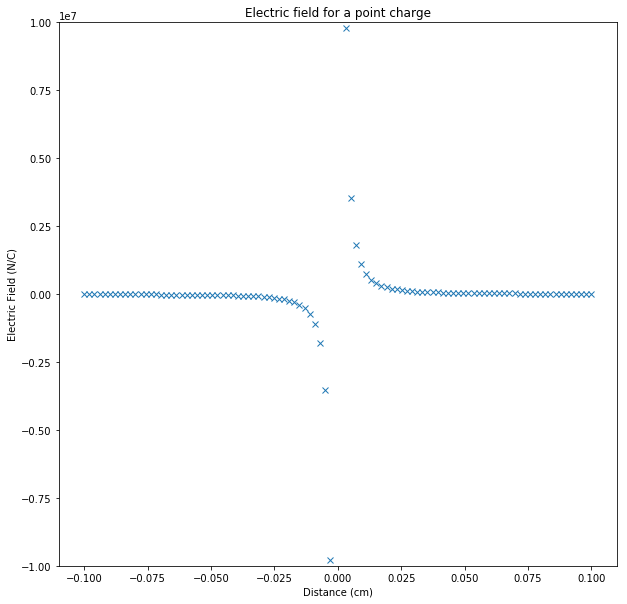

In [275]:
#Make a plot to make sure it works
x = np.linspace(-.1,.1,100)
plt.figure(figsize = (10,10))

plt.plot(x,e_field1(x), 'x')
plt.xlabel('Distance (cm)')
plt.ylabel('Electric Field (N/C)')
plt.title('Electric field for a point charge')
plt.ylim(-1e7,1e7)
plt.show()

Does this look reasonable? What direction should the field be pointing to the left and to the right for a possitive charge? What if we had a negative charge? 

In [276]:
def e_field2(r):
    """
    Finds the electric field at one point for a point charge at x0
    
    Inputs
    ----------
    r:  Where I want to know the strength of the electric field.
    
    Output:
    
    E:  Electric field at point r (N*C)
    """
    k = 8.99e9 #1/(4pi eps_0) (N*m^2/C^2)
    x0 = -10e-2 #Possition of the charge (m)
    R = r - x0
    q = 5e-9  #Charge (C)
    return k*q/R**3*abs(R)

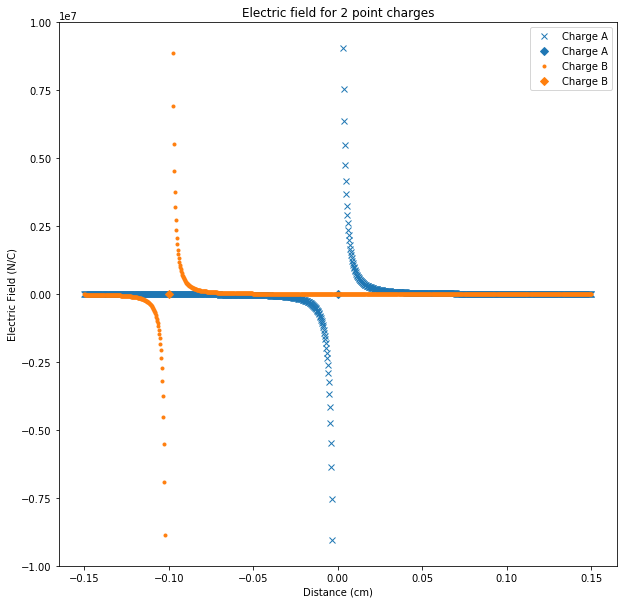

In [279]:
#Make a plot for each charge 
x = np.linspace(-15e-2,15e-2,1000)
plt.figure(figsize = (10,10))

plt.plot(x, e_field1(x), 'x', 0,0, 'D', color = 'C0', label = 'Charge A')
plt.plot(x, e_field2(x), '.', -10e-2, 0, 'D', color = 'C1', label = 'Charge B')
plt
plt.xlabel('Distance (cm)')
plt.ylabel('Electric Field (N/C)')
plt.title('Electric field for 2 point charges')
plt.ylim(-1e7,1e7)
plt.legend()
plt.show()

I want to have one plot for the total electric field,

In [280]:
def e_field_total(r):
    """
    Finds the electric field from charge A and B
    
    Inputs
    ----------
    r:  Where I want to know the strength of the electric field.
    
    Output:
    
    E:  Electric field at point r (N*C)
    """
    return e_field1(r) + e_field2(r) 

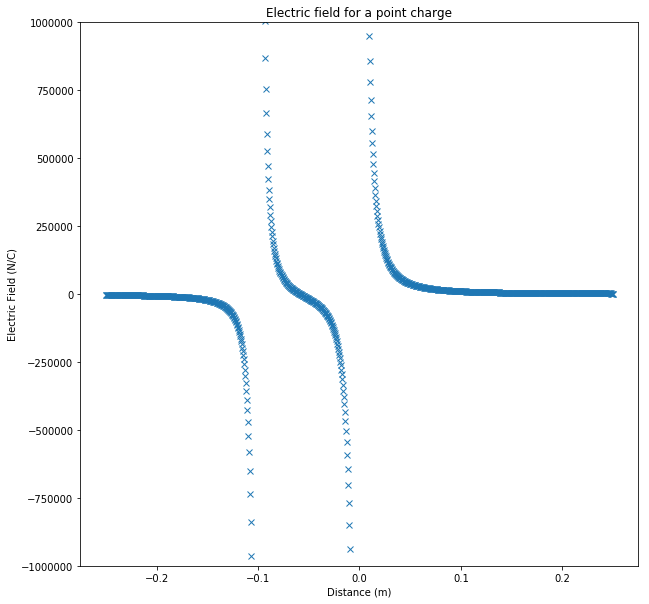

In [283]:
#Make a plot to make sure it works
r = np.linspace(-25e-2,25e-2,1000)
plt.figure(figsize = (10,10))

plt.plot(r,e_field_total(r),'x')
plt.xlabel('Distance (m)')
plt.ylabel('Electric Field (N/C)')
plt.title('Electric field for a point charge')
plt.ylim(-1e6,1e6)
plt.show()

Hard to tell where the zeros are looking at this so lets plot different regions in their own plots and see how it looks,

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


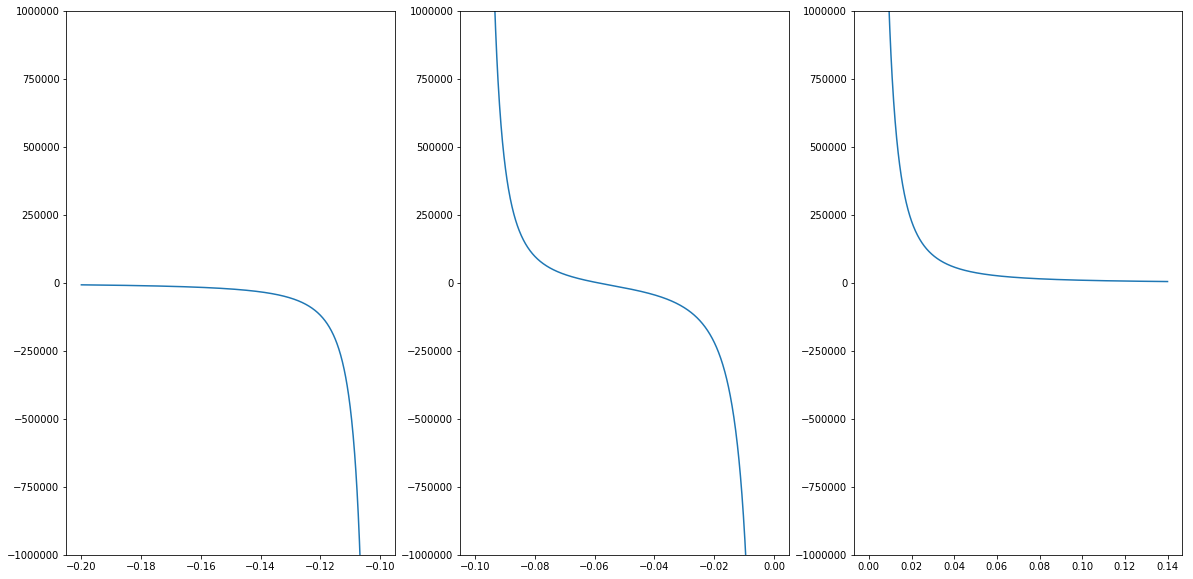

In [284]:
charges = [10e-6, 5e-6] #Charges (C)
place = [0, -1e-2] #Where the charge is (m)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))

r1 = np.linspace(-20e-2,-10e-2,1000)
ax1.plot(r1, e_field_total(r1))
ax1.set_ylim(-1e6,1e6)

r2 = np.linspace(-10e-2, 0,1000)
ax2.plot(r2, e_field_total(r2))
ax2.set_ylim(-1e6,1e6)

r3 = np.linspace(0, 14e-2,1000)
ax3.plot(r3, e_field_total(r3))
ax3.set_ylim(-1e6,1e6)
plt.show()

Now to use Newtons method we need to find the derivative of the function, but these are absolute values around and that can make finding the derivative a little difficult. But I only need the derivative in the middle region.

In [285]:
def e_field_deriv1(r):
    """
    Finds the electric field at one point for a point charge at x0
    
    Inputs
    ----------
    r:  Where I want to know the strength of the electric field.
    
    Output:
    
    E:  Electric field at point r (N*C)
    """
    k = 8.99e9 #1/(4pi eps_0) (N*m^2/C^2)
    x0 = 0
    q = 10e-9
    R = r - x0
    return -2*k*q/R**4*abs(R)

def e_field_deriv2(r):
    """
    Finds the electric field at one point for a point charge at x0
    
    Inputs
    ----------
    r:  Where I want to know the strength of the electric field.
    
    Output:
    
    E:  Electric field at point r (N*C)
    """
    k = 8.99e9 #1/(4pi eps_0) (N*m^2/C^2)
    x0 = -10e-2
    q = 5e-9
    R = r - x0
    return -2*k*q/R**4*abs(R)
def e_deriv_total(r):
    return e_field_deriv1(r) + e_field_deriv2(r)

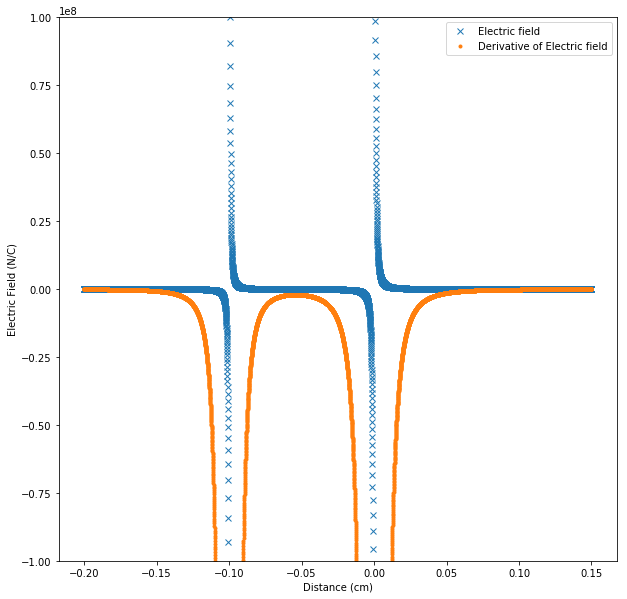

In [288]:
#Make a plot to make sure it works
r = np.linspace(-20e-2,15e-2,10000)
plt.figure(figsize = (10,10))

plt.plot(r,e_field_total(r),'x', label = 'Electric field')
plt.plot(r, e_deriv_total(r),'.', label = 'Derivative of Electric field')
plt.xlabel('Distance (cm)')
plt.ylabel('Electric Field (N/C)')
plt.legend()
plt.ylim(-1e8,1e8)
plt.show()

In [215]:
# %load newton.py
def newton(func_name, deriv_name, x_guess):
    """
    Finds the roots of the input function func_name using newtons method

    Inputs
    ----------
    function_name:  Name of the function that we want to solve for. This should
                    either be a built in function or a .py file name.

    deriv_name:     Name of the derivative of function_name

    x_guess:        Newton's Method needs and Initial guess at the solutions.
                    Doesn't have to be a good guess. But the better the guess the
                    faster you'll get to the correct answer

    Output
    ----------
    x_zero: Returns the value that gives f(x_zero) = 0
    """

    #Start by setting x_zero equal to my initial guess
    x_zero = x_guess

    for i in range(20):
        f = func_name(x_zero)
        fp = deriv_name(x_zero)
        delta_x = -f/fp
        x_zero += delta_x   #This is the same as x_zero = x_zero + delta_x

        #If x_zero is within the tolerance then we can return the answer and quit
        if abs(delta_x) < 0.5e-5 * abs(x_zero):
            return x_zero

    #If we didn't find an accurate answer after 20 tries, we say it's good enough
    #and return what ever answer we have. Remember it’s possible to get stuck in
    #an infinite loop with Newton’s method so having an emergency exit built into
    #the code is a good idea.
    print("Closest answer after 20 tries is", x_zero)
    return x_zero


In [290]:
x_zero = newton(e_field_total, e_deriv_total, -0.06)
print(x_zero)

-0.05857864376269105


In [291]:
e_field_total(x_zero)

1.1896190699189901e-09

## Why this way?
Lets go back and look at a simpler example of equation 2 in the book we used last week

In [308]:
# %load equation2.py
import numpy as np
def equation2(x):
    """
    Equation 2.2 from the book.

    Input
    ----------
    x: Value I want to evaluate equation 2.2 at

    Output
    ----------
    Value of the function at 'x', f(x)
    """
    return np.exp(x) - 3*x**2


In [307]:
def deriv_eq2(x):
    return np.exp(x) - 6*x

In [316]:
x_zero_n = newton(equation2, deriv_eq2, -.1)
x_zero_n

-0.45896226753703967

In [317]:
equation2(x_zero_n)

-3.08530978543331e-13

In [315]:
x_zero_b = bisect(equation2, -1,0)
x_zero_b

-0.45896339416503906

In [319]:
equation2(x_zero_b)

-3.814442434690868e-06

In [318]:
#How similar are the answers?
x_zero_b - x_zero_n

-1.1266279993926709e-06

These seem to work more or less the exact same, but with newton we can't really control what zero we will find

In [337]:
guesses = np.linspace(-5,5,100)

In [336]:
for g in guesses:
    print('When our guess was {:.3f} the zero found was, {}'.format(g,newton(equation2, deriv_eq2, g)))

When our guess was -5.000 the zero found was, -0.4589622675371023
When our guess was -4.796 the zero found was, -0.4589622675369919
When our guess was -4.592 the zero found was, -0.45896226753695946
When our guess was -4.388 the zero found was, -0.45896226753695096
When our guess was -4.184 the zero found was, -0.45896226753694896
When our guess was -3.980 the zero found was, -0.4589622675369486
When our guess was -3.776 the zero found was, -0.4589622675369485
When our guess was -3.571 the zero found was, -0.4589622675369485
When our guess was -3.367 the zero found was, -0.4589622675369485
When our guess was -3.163 the zero found was, -0.4589622675369485
When our guess was -2.959 the zero found was, -0.4589622675369485
When our guess was -2.755 the zero found was, -0.4589622675393518
When our guess was -2.551 the zero found was, -0.4589622675372251
When our guess was -2.347 the zero found was, -0.45896226753697034
When our guess was -2.143 the zero found was, -0.4589622675369496
When o

With bisect I can make sure it finds the zero I want to find. 

But what about speed?

In [342]:
%timeit newton(equation2, deriv_eq2, -.1)
%timeit bisect(equation2, -1,0)

30.4 µs ± 917 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
293 µs ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Newton will normaly be faster, but not always,

In [369]:
newton(equation2,deriv_eq2, 0.205)

Closest answer after 20 tries is 426.24701062885157


426.24701062885157

We run into problems when the derivative of the function gets close to zero.